In [1]:
%pip install numpy
%pip install pandas
%pip install pandas
%pip install matplotlib
%pip install geopandas
%pip install scikit-learn
%pip install nltk matplotlib
%pip install WordCloud
%pip install Counter
%pip install nltk

import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import ast
#import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [64]:
# and view datasets to understand the content
df = pd.read_csv('./english_reviews3Filter.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770993 entries, 0 to 770992
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ratings            770993 non-null  object 
 1   title              770993 non-null  object 
 2   text               770993 non-null  object 
 3   author             770993 non-null  object 
 4   date_stayed        739764 non-null  object 
 5   offering_id        770993 non-null  int64  
 6   num_helpful_votes  770993 non-null  int64  
 7   date               770993 non-null  object 
 8   id                 770993 non-null  int64  
 9   via_mobile         770993 non-null  bool   
 10  hotel_class        739963 non-null  float64
 11  region_id          770993 non-null  int64  
 12  url                770993 non-null  object 
 13  phone              0 non-null       float64
 14  details            0 non-null       float64
 15  address            770993 non-null  object 
 16  ty

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,hotel_class,region_id,url,phone,details,address,type,name,detected_language
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,False,3.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '2130 Broad...",hotel,Hotel Beacon,en
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,False,3.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '2130 Broad...",hotel,Hotel Beacon,en
2,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Excellent location”,Loved the hotel. Great location - only 2 block...,"{'username': 'Erica1103', 'num_cities': 2, 'nu...",December 2012,93338,0,2012-12-17,147634248,False,3.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '2130 Broad...",hotel,Hotel Beacon,en
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,"{'username': 'rmfindc', 'num_reviews': 8, 'num...",December 2012,93338,0,2012-12-17,147625002,False,3.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '2130 Broad...",hotel,Hotel Beacon,en
4,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...","{'username': 'MiloandMaya', 'num_cities': 2, '...",December 2012,93338,0,2012-12-17,147623184,False,3.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '2130 Broad...",hotel,Hotel Beacon,en


Graphic with number of reviews per establishment types

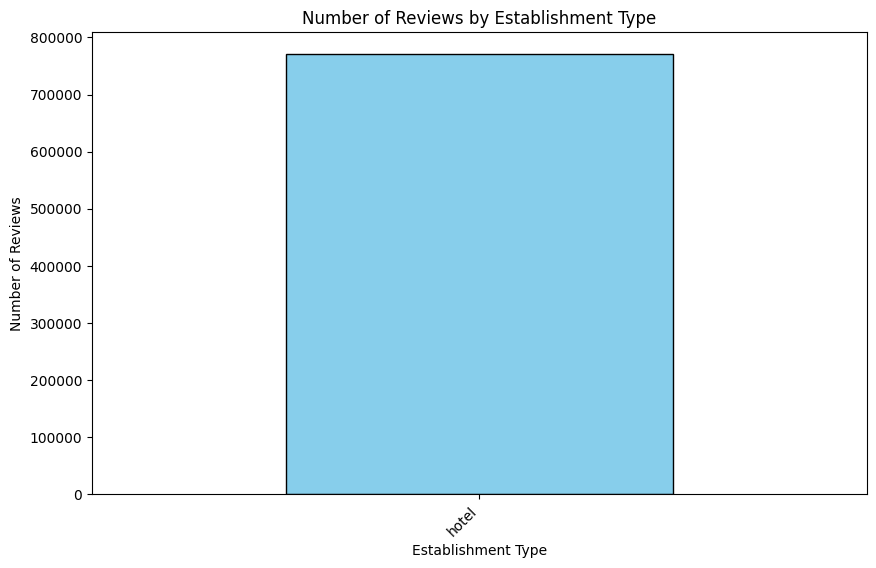

In [3]:
# Assuming 'df' is your DataFrame and 'type' is the column with establishment types
type_counts = df['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Number of Reviews by Establishment Type')
plt.xlabel('Establishment Type')
plt.ylabel('Number of Reviews')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

PRe processing: Remotion of unused columns

In [65]:
columns_to_remove = ['author', 'type','offering_id','id','num_helpful_votes','date_stayed','via_mobile','region_id','url','phone','details','detected_language']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)
df.head()


,ratings,title,text,date,hotel_class,address,name
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
2,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Excellent location”,Loved the hotel. Great location - only 2 block...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
4,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770993 entries, 0 to 770992
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ratings      770993 non-null  object 
 1   title        770993 non-null  object 
 2   text         770993 non-null  object 
 3   date         770993 non-null  object 
 4   hotel_class  739963 non-null  float64
 5   address      770993 non-null  object 
 6   name         770993 non-null  object 
dtypes: float64(1), object(6)
memory usage: 41.2+ MB


Convert column json into different columns

In [67]:
#Decode Json Colums
def clean_json(x):
    "Create apply function for decoding JSON"
    try:
        # If x is not a string, convert it to a string
        if not isinstance(x, str):
            x = str(x)
        # Evaluate the literal expression using ast.literal_eval
        data = ast.literal_eval(x)

        # Convert the evaluated expression to a valid JSON string
        json_string = json.dumps(data)

        # Load the JSON string
        return json.loads(json_string)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}\nJSON String: {x}")
        return None  # or handle the error as needed


Obtain information inside address columns and remove unecessary one

In [68]:
json_cols = ['address']

for x in json_cols:
    df[x] = df[x].apply(clean_json)

normalized_cols = pd.json_normalize(df['address'])
df = df.join(normalized_cols)
df = df.drop(json_cols, axis=1)

df.head()

,ratings,title,text,date,hotel_class,name,region,street-address,postal-code,locality
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,3.0,Hotel Beacon,NY,2130 Broadway at 75th Street,10023,New York City
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,3.0,Hotel Beacon,NY,2130 Broadway at 75th Street,10023,New York City
2,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Excellent location”,Loved the hotel. Great location - only 2 block...,2012-12-17,3.0,Hotel Beacon,NY,2130 Broadway at 75th Street,10023,New York City
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,2012-12-17,3.0,Hotel Beacon,NY,2130 Broadway at 75th Street,10023,New York City
4,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...",2012-12-17,3.0,Hotel Beacon,NY,2130 Broadway at 75th Street,10023,New York City


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770993 entries, 0 to 770992
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ratings         770993 non-null  object 
 1   title           770993 non-null  object 
 2   text            770993 non-null  object 
 3   date            770993 non-null  object 
 4   hotel_class     739963 non-null  float64
 5   name            770993 non-null  object 
 6   region          770993 non-null  object 
 7   street-address  770993 non-null  object 
 8   postal-code     769305 non-null  object 
 9   locality        770993 non-null  object 
dtypes: float64(1), object(9)
memory usage: 58.8+ MB


In [70]:
columns_to_remove = ['street-address', 'postal-code','locality']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770993 entries, 0 to 770992
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ratings      770993 non-null  object 
 1   title        770993 non-null  object 
 2   text         770993 non-null  object 
 3   date         770993 non-null  object 
 4   hotel_class  739963 non-null  float64
 5   name         770993 non-null  object 
 6   region       770993 non-null  object 
dtypes: float64(1), object(6)
memory usage: 41.2+ MB


Obtain information inside ratings and remove unecessary ones

In [71]:
json_cols = ['ratings']

for x in json_cols:
    df[x] = df[x].apply(clean_json)

normalized_cols = pd.json_normalize(df['ratings'])
df = df.join(normalized_cols)
df = df.drop(json_cols, axis=1)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770993 entries, 0 to 770992
Data columns (total 15 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   title                                   770993 non-null  object 
 1   text                                    770993 non-null  object 
 2   date                                    770993 non-null  object 
 3   hotel_class                             739963 non-null  float64
 4   name                                    770993 non-null  object 
 5   region                                  770993 non-null  object 
 6   service                                 691497 non-null  float64
 7   cleanliness                             691528 non-null  float64
 8   overall                                 770993 non-null  float64
 9   value                                   691896 non-null  float64
 10  location                                6075

In [72]:
df = df.drop(['check_in_front_desk', 'business_service_(e_g_internet_access)'], axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770993 entries, 0 to 770992
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   title          770993 non-null  object 
 1   text           770993 non-null  object 
 2   date           770993 non-null  object 
 3   hotel_class    739963 non-null  float64
 4   name           770993 non-null  object 
 5   region         770993 non-null  object 
 6   service        691497 non-null  float64
 7   cleanliness    691528 non-null  float64
 8   overall        770993 non-null  float64
 9   value          691896 non-null  float64
 10  location       607510 non-null  float64
 11  sleep_quality  453380 non-null  float64
 12  rooms          640305 non-null  float64
dtypes: float64(8), object(5)
memory usage: 76.5+ MB


Calculate the sentiment based on ratings

Steps:
    - Check if there are no Nan value in the ratings, if there is fix that
    - Round rating values to 1 decimal point
    - Make correspond rating values to sentiments

In [73]:
# Check if the dataset contains any NaN values
if df.isna().any().any():
    print("The dataset contains NaN values.")
else:
    print("The dataset does not contain any NaN values.")

The dataset contains NaN values.


Removes Nan values by imputing them 

In [75]:
# Iteratively impute missing values for ratings based on other correlated rating features-
# Necessario porque valores nao existentes nao sao -1 como é habitual, apenas nao aparecem

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

impute_cols = ['overall', 'service', 'rooms', 'cleanliness', 'sleep_quality', 'location', 'value']

# Create an IterativeImputer and fit it to the selected columns
imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(df[impute_cols])

# Impute the missing values for the selected columns
df[impute_cols] = imputer.transform(df[impute_cols])

In [76]:
#Adds missing values based on all the other existign values

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df['hotel_class'] = imputer.fit_transform(df[['overall', 'hotel_class']])
df.head()

,title,text,date,hotel_class,name,region,service,cleanliness,overall,value,location,sleep_quality,rooms
0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,“Excellent location”,Loved the hotel. Great location - only 2 block...,2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,4.0,5.0,5.0,5.0
4,“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...",2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,4.0,5.0,5.0,5.0


In [77]:
# Check if the dataset contains any NaN values
if df.isna().any().any():
    print("The dataset contains NaN values.")
else:
    print("The dataset does not contain any NaN values.")

The dataset does not contain any NaN values.


In [79]:
# Round up ratings to 1 decimal point
df[['overall', 'service', 'rooms', 'cleanliness', 'sleep_quality', 'location', 'value']] = df[['overall', 'service', 'rooms', 'cleanliness', 'sleep_quality', 'location', 'value']].round(1)
df.head()

,title,text,date,hotel_class,name,region,service,cleanliness,overall,value,location,sleep_quality,rooms
0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,“Excellent location”,Loved the hotel. Great location - only 2 block...,2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,4.0,5.0,5.0,5.0
4,“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...",2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,4.0,5.0,5.0,5.0


In [81]:
df['overall'] = np.round(df['overall'] )
print(df['overall'])
unique_values = df['overall'].unique()
print(unique_values)

0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
770988    5.0
770989    5.0
770990    5.0
770991    5.0
770992    5.0
Name: overall, Length: 770993, dtype: float64
[5. 4. 3. 2. 1. 0.]


In [82]:
# Define the mapping function based on conditions
def map_sentiment(value):
    if np.isclose(value, 0.0) or 1.0 <= value <= 3.0:
        return 'negative'
    elif 3.0 < value <= 5.0:
        return 'positive'
    else:
        return 'undefined'  # Add a default value or handle other cases as needed

# Apply the mapping function to create the 'True_Sentiment' column
df['True_Sentiment'] = df['overall'].apply(map_sentiment)
df.head()

,title,text,date,hotel_class,name,region,service,cleanliness,overall,value,location,sleep_quality,rooms,True_Sentiment
0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,5.0,5.0,5.0,5.0,positive
1,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,5.0,5.0,5.0,5.0,positive
2,“Excellent location”,Loved the hotel. Great location - only 2 block...,2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,5.0,5.0,5.0,5.0,positive
3,“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,4.0,5.0,5.0,5.0,positive
4,“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...",2012-12-17,5.0,Hotel Beacon,NY,5.0,5.0,5.0,4.0,5.0,5.0,5.0,positive


In [83]:
# Print the number of positive, negative, and neutral reviews
print("Number of positive reviews:", len(df[df['True_Sentiment'] == 'positive']))
print("Number of negative reviews:", len(df[df['True_Sentiment'] == 'negative']))

Number of positive reviews: 564040
Number of negative reviews: 206953


Create extra sentiment column with 1:pos, 0:neg
Deal with unbalanced dataset 
Process text reviews (create extra column for clean_text)
Sentiment analysis with Text Classification-Logistic regressions

In [84]:
df2=df
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770993 entries, 0 to 770992
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           770993 non-null  object 
 1   text            770993 non-null  object 
 2   date            770993 non-null  object 
 3   hotel_class     770993 non-null  float64
 4   name            770993 non-null  object 
 5   region          770993 non-null  object 
 6   service         770993 non-null  float64
 7   cleanliness     770993 non-null  float64
 8   overall         770993 non-null  float64
 9   value           770993 non-null  float64
 10  location        770993 non-null  float64
 11  sleep_quality   770993 non-null  float64
 12  rooms           770993 non-null  float64
 13  True_Sentiment  770993 non-null  object 
dtypes: float64(8), object(6)
memory usage: 82.4+ MB


Removed duplicate values

In [85]:
df2.drop_duplicates(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 770951 entries, 0 to 770992
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           770951 non-null  object 
 1   text            770951 non-null  object 
 2   date            770951 non-null  object 
 3   hotel_class     770951 non-null  float64
 4   name            770951 non-null  object 
 5   region          770951 non-null  object 
 6   service         770951 non-null  float64
 7   cleanliness     770951 non-null  float64
 8   overall         770951 non-null  float64
 9   value           770951 non-null  float64
 10  location        770951 non-null  float64
 11  sleep_quality   770951 non-null  float64
 12  rooms           770951 non-null  float64
 13  True_Sentiment  770951 non-null  object 
dtypes: float64(8), object(6)
memory usage: 88.2+ MB


In [86]:
# Print the number of positive, negative, and neutral reviews
print("Number of positive reviews:", len(df2[df2['True_Sentiment'] == 'positive']))
print("Number of negative reviews:", len(df2[df2['True_Sentiment'] == 'negative']))

Number of positive reviews: 564006
Number of negative reviews: 206945


In [87]:
df2.to_csv('./midleDatasets/dataset_With_True_Sentiments.csv', index=False)

RE-run from here dataset with true sentiment 

In [ ]:
# df2 = pd.read_csv('./midleDatasets/dataset_With_True_Sentiments.csv')

Pre-processing of Text reviews

In [88]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

Removes unwanted characters, stopwords (is, are,...), and format the text to create fewer nulls word embeddings

In [89]:
import re

def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
   
    # Remove non-English characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    # Tokenize each word
    text =  nltk.WordPunctTokenizer().tokenize(text)
        
    return text

In [90]:

df2['clean_text'] = list(map(clean_text, df2['text']))
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 770951 entries, 0 to 770992
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           770951 non-null  object 
 1   text            770951 non-null  object 
 2   date            770951 non-null  object 
 3   hotel_class     770951 non-null  float64
 4   name            770951 non-null  object 
 5   region          770951 non-null  object 
 6   service         770951 non-null  float64
 7   cleanliness     770951 non-null  float64
 8   overall         770951 non-null  float64
 9   value           770951 non-null  float64
 10  location        770951 non-null  float64
 11  sleep_quality   770951 non-null  float64
 12  rooms           770951 non-null  float64
 13  True_Sentiment  770951 non-null  object 
 14  clean_text      770951 non-null  object 
dtypes: float64(8), object(7)
memory usage: 94.1+ MB


In [91]:
# Just to check
first_row_text = str(df2.loc[3, 'clean_text'])  # Convert to string
print(first_row_text)

for index, text_value in enumerate(df3['clean_text'].head(3)):
    # Check if the value is a list and convert it to a string
    if isinstance(text_value, list):
        text_value = ', '.join(map(str, text_value))

    print(f"Row {index + 1}: {text_value}")

['first', 'stay', 'upper', 'west', 'side', 'cant', 'say', 'enough', 'good', 'things', 'hotel', 'beacon', 'stayed', 'based', 'reviews', 'family', 'friendly', 'hotels', 'im', 'sure', 'exactly', 'family', 'friendly', 'hotel', 'except', 'suites', 'kitchenettes', 'budgetconscious', 'families', 'werent', 'special', 'programs', 'kids', 'see', 'families', 'nyc', 'nice', 'sized', 'queen', 'suite', 'gave', 'us', 'everything', 'needed', 'didnt', 'use', 'kitchen', 'overnight', 'stay', 'definitely', 'would', 'future', 'rooms', 'comfortable', 'ok', 'little', 'tight', 'foot', 'bed', 'like', 'complaints', 'described', 'amenities', 'really', 'appreciated', 'eg', 'free', 'wifi', 'keurig', 'coffee', 'service', 'room', 'desk', 'area', 'energy', 'efficient', 'rooms', 'put', 'room', 'card', 'device', 'controls', 'electricity', 'save', 'energy', 'youre', 'lovely', 'bathrooms', 'although', 'need', 'hand', 'towel', 'holder', 'really', 'comfortable', 'family', 'kiddo', 'slept', 'pullout', 'sofa', 'room', 'good'

In [92]:

def find_most_common_word(df, column_name,top_n=20):

    # Concatenate all lists of tokens into a single list
    all_words = [word for tokens in df[column_name] for word in tokens]
    
    # Count the frequency of each word
    word_counter = Counter(all_words)
    
    # Find the most common word and its frequency
    most_common_word = word_counter.most_common(top_n)
    
    return most_common_word

most_common_word = find_most_common_word(df2, 'clean_text')

print(f"The most common words are '{most_common_word}")

The most common words are '[('hotel', 1397923), ('room', 1184986), ('stay', 526064), ('great', 525158), ('staff', 487082), ('would', 426597), ('rooms', 395630), ('good', 371361), ('location', 366532), ('nice', 365445), ('one', 361691), ('stayed', 332320), ('clean', 319694), ('us', 311718), ('night', 297844), ('service', 284213), ('breakfast', 270380), ('get', 257597), ('time', 245049), ('also', 239749)]


Dataset with True sentiment and Clean Text

In [93]:
df2.to_csv('./midleDatasets/dataset_With_TS_Clean_Text.csv', index=False)

!!Re-Run from here!! Dataset with true sentiment and Clean text

In [4]:
df2 = pd.read_csv('./midleDatasets/dataset_With_TS_Clean_Text.csv')

CLassification

Train test split- using undersampling after the disvision
(The rule of thumb is: never mess up with your test set. Always split into test and train sets BEFORE trying oversampling/undersampling techniques!)
Undersampling should be applied only to your training dataset

Divide into training and test

In [5]:
# Map sentiment labels to numeric values
df2['Value_True_sentiment'] = df2['True_Sentiment'].map({'positive': 1, 'negative': 0})


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df2['text'], df2['Value_True_sentiment'], test_size=0.3, random_state=42)


In [7]:
# Combine the training features and labels into a single DataFrame
train_data = pd.DataFrame({'text': X_train, 'True_Sentiment': y_train})

In [8]:
train_data.to_csv("./midleDatasets/train_dataset.csv")

Undersampling

In [97]:

def balance_dataframe(dataset, sentiment_column='True_Sentiment', random_state=42):
    
    # Count the number of entries for each sentiment type
    sentiment_counts = dataset[sentiment_column].value_counts()
    print("Sentiment counts before balancing:\n", sentiment_counts)
    
    # Determine the target number of entries based on the smallest class
    min_samples = sentiment_counts.min()
    
    # Sample the same number of entries for each sentiment type
    balanced_data = pd.DataFrame()
    
    for sentiment in sentiment_counts.index:
        if sentiment_counts[sentiment] >= min_samples:
            subset = dataset[dataset[sentiment_column] == sentiment].sample(n=min_samples, random_state=random_state)
        else:
            subset = dataset[dataset[sentiment_column] == sentiment]
            print(f"Warning: Not enough samples for sentiment '{sentiment}'. Only {len(subset)} entries available.")
        
        balanced_data = pd.concat([balanced_data, subset])
    
    # Shuffle the resulting balanced DataFrame
    balanced_data = balanced_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    # Print counts after balancing
    print("Sentiment counts after balancing:\n", balanced_data[sentiment_column].value_counts())
    
    return balanced_data

# Example usage with a DataFrame named 'dataset'
# dataset = pd.read_csv('your_dataset.csv')  # Load your dataset here

# Balance the DataFrame
train_data_balanced = balance_dataframe(train_data)

print(f'Number of entries in the balanced DataFrame: {len(train_data_balanced)}')

# Now you can use the balanced_df DataFrame for further processing

Sentiment counts before balancing:
 True_Sentiment
1    394961
0    144704
Name: count, dtype: int64
Sentiment counts after balancing:
 True_Sentiment
0    144704
1    144704
Name: count, dtype: int64
Number of entries in the balanced DataFrame: 289408


In [98]:

# Separate the balanced training data into features and labels
X_train_balanced = train_data_balanced['text']
y_train_balanced = train_data_balanced['True_Sentiment']

Classificação

TF-IDF

1-gram

In [99]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [100]:

# Transform text data to TF-IDF features
vectorizer = TfidfVectorizer(
    stop_words='english', # Remove English stop words
    max_df=0.95,   # Ignore terms that appear in more than 95% of documents
    min_df=5,  # Ignore terms that appear in fewer than 5 reviews
    max_features=5000,  # Keep only the top 5000 features
    ngram_range=(1, 1), # Use unigrams only
    sublinear_tf=True) # Apply sublinear term frequency scaling

X_train_tfidf = vectorizer.fit_transform(X_train_balanced)
X_test_tfidf = vectorizer.transform(X_test)

# Train the model with multi-class classification
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train_balanced)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Get feature names and weights
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_[0]

# Create a DataFrame for each class with feature names and their corresponding weights
weights_df = pd.DataFrame({'feature': feature_names, 'weight': weights})

# Sort the DataFrame by weights
weights_df = weights_df.sort_values(by='weight', ascending=False)

# Get top positive and negative features
top_positive = weights_df.head(10)
top_negative = weights_df.tail(10)


print('Top positive features:')
print(top_positive)
print('\nTop negative features:')
print(top_negative)


Accuracy: 88.37%
              precision    recall  f1-score   support

    negative       0.74      0.88      0.80     62241
    positive       0.95      0.89      0.92    169045

    accuracy                           0.88    231286
   macro avg       0.85      0.88      0.86    231286
weighted avg       0.89      0.88      0.89    231286

Top positive features:
         feature    weight
2039       great  8.506845
2673       loved  7.981851
3223     perfect  7.887064
2178      highly  7.565836
1655   excellent  7.311866
4935   wonderful  6.724113
297      amazing  6.427809
3303     pleased  6.333833
1302  definitely  5.828136
4174    spotless  5.430810

Top negative features:
       feature    weight
2228  horrible -6.180869
3054        ok -6.216993
4504      tiny -6.416594
1261     dated -6.589148
4445  terrible -7.177905
466    average -7.275810
3330      poor -8.126582
3774      rude -8.171475
4957     worst -8.575810
1396     dirty -8.846646


-----------------------RESULTS:------------------------

Accuracy: 88.37%
              precision    recall  f1-score   support

    negative       0.74      0.88      0.80     62241
    positive       0.95      0.89      0.92    169045

    accuracy                           0.88    231286
   macro avg       0.85      0.88      0.86    231286
weighted avg       0.89      0.88      0.89    231286

Top positive features:
         feature    weight
2039       great  8.506845
2673       loved  7.981851
3223     perfect  7.887064
2178      highly  7.565836
1655   excellent  7.311866
4935   wonderful  6.724113
297      amazing  6.427809
3303     pleased  6.333833
1302  definitely  5.828136
4174    spotless  5.430810

Top negative features:
       feature    weight
2228  horrible -6.180869
3054        ok -6.216993
4504      tiny -6.416594
1261     dated -6.589148
4445  terrible -7.177905
466    average -7.275810
3330      poor -8.126582
3774      rude -8.171475
4957     worst -8.575810
1396     dirty -8.846646

Bi-gram

In [101]:
# Transform text data to TF-IDF features
vectorizer = TfidfVectorizer(
    stop_words='english', # Remove English stop words
    max_df=0.95,   # Ignore terms that appear in more than 95% of documents
    min_df=5,  # Ignore terms that appear in fewer than 5 reviews
    max_features=5000,  # Keep only the top 5000 features
    ngram_range=(2, 2), # Use unigrams only
    sublinear_tf=True) # Apply sublinear term frequency scaling

X_train_tfidf = vectorizer.fit_transform(X_train_balanced)
X_test_tfidf = vectorizer.transform(X_test)

# Train the model with multi-class classification
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train_balanced)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Get feature names and weights
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_[0]

# Create a DataFrame for each class with feature names and their corresponding weights
weights_df = pd.DataFrame({'feature': feature_names, 'weight': weights})

# Sort the DataFrame by weights
weights_df = weights_df.sort_values(by='weight', ascending=False)

# Get top positive and negative features
top_positive = weights_df.head(10)
top_negative = weights_df.tail(10)


print('Top positive features:')
print(top_positive)
print('\nTop negative features:')
print(top_negative)

Accuracy: 84.34%
              precision    recall  f1-score   support

    negative       0.67      0.84      0.74     62241
    positive       0.93      0.85      0.89    169045

    accuracy                           0.84    231286
   macro avg       0.80      0.84      0.81    231286
weighted avg       0.86      0.84      0.85    231286

Top positive features:
                    feature    weight
1027        definitely stay  8.623065
1858       highly recommend  7.642026
1026      definitely return  6.373402
2652            loved hotel  5.878553
1323  exceeded expectations  5.529761
1859     highly recommended  5.420604
1022        definately stay  5.390737
1025   definitely recommend  5.363169
1742             great stay  5.339992
2655             loved stay  5.272289

Top negative features:
             feature    weight
3857     rooms dated -4.677622
1072  desperate need -4.739371
4975     wouldn stay -4.902055
4018    service poor -4.918949
3274   positive note -5.134156
4816 

-----------------------RESULTS:------------------------

Accuracy: 84.34%
              precision    recall  f1-score   support

    negative       0.67      0.84      0.74     62241
    positive       0.93      0.85      0.89    169045

    accuracy                           0.84    231286
   macro avg       0.80      0.84      0.81    231286
weighted avg       0.86      0.84      0.85    231286

Top positive features:
                    feature    weight
1027        definitely stay  8.623065
1858       highly recommend  7.642026
1026      definitely return  6.373402
2652            loved hotel  5.878553
1323  exceeded expectations  5.529761
1859     highly recommended  5.420604
1022        definately stay  5.390737
1025   definitely recommend  5.363169
1742             great stay  5.339992
2655             loved stay  5.272289

Top negative features:
             feature    weight
3857     rooms dated -4.677622
1072  desperate need -4.739371
4975     wouldn stay -4.902055
4018    service poor -4.918949
3274   positive note -5.134156
4816     walls paper -5.278891
2083        hotel ok -5.944635
4279      staff rude -6.009758
3643      room dirty -6.011174
4965     worst hotel -6.891394

Better results with less options in the vectorizer but the informationis not very good.
Less options next:

In [102]:
# Transform text data to TF-IDF features
vectorizer = TfidfVectorizer(
    stop_words='english', # Remove English stop words
    max_features=5000,  # Keep only the top 5000 features
    ngram_range=(2, 2)) # Use unigrams only) # Apply sublinear term frequency scaling

X_train_tfidf = vectorizer.fit_transform(X_train_balanced)
X_test_tfidf = vectorizer.transform(X_test)

# Train the model with multi-class classification
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train_balanced)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Get feature names and weights
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_[0]

# Create a DataFrame for each class with feature names and their corresponding weights
weights_df = pd.DataFrame({'feature': feature_names, 'weight': weights})

# Sort the DataFrame by weights
weights_df = weights_df.sort_values(by='weight', ascending=False)

# Get top positive and negative features
top_positive = weights_df.head(10)
top_negative = weights_df.tail(10)


print('Top positive features:')
print(top_positive)
print('\nTop negative features:')
print(top_negative)

Accuracy: 84.34%
              precision    recall  f1-score   support

    negative       0.67      0.84      0.74     62241
    positive       0.93      0.85      0.89    169045

    accuracy                           0.84    231286
   macro avg       0.80      0.84      0.81    231286
weighted avg       0.86      0.84      0.85    231286

Top positive features:
                    feature    weight
1027        definitely stay  8.764906
1857       highly recommend  7.851091
1026      definitely return  6.302743
2651            loved hotel  5.799865
1323  exceeded expectations  5.436941
1742             great stay  5.427452
1025   definitely recommend  5.388147
1858     highly recommended  5.346422
1022        definately stay  5.322617
2654             loved stay  5.280619

Top negative features:
             feature    weight
3858     rooms dated -4.653750
1072  desperate need -4.774947
4975     wouldn stay -4.874164
4019    service poor -4.891940
3274   positive note -5.200442
4816 

-----------------------RESULTS:------------------------

Accuracy: 84.34%
              precision    recall  f1-score   support

    negative       0.67      0.84      0.74     62241
    positive       0.93      0.85      0.89    169045

    accuracy                           0.84    231286
   macro avg       0.80      0.84      0.81    231286
weighted avg       0.86      0.84      0.85    231286

Top positive features:
                    feature    weight
1027        definitely stay  8.764906
1857       highly recommend  7.851091
1026      definitely return  6.302743
2651            loved hotel  5.799865
1323  exceeded expectations  5.436941
1742             great stay  5.427452
1025   definitely recommend  5.388147
1858     highly recommended  5.346422
1022        definately stay  5.322617
2654             loved stay  5.280619

Top negative features:
             feature    weight
3858     rooms dated -4.653750
1072  desperate need -4.774947
4975     wouldn stay -4.874164
4019    service poor -4.891940
3274   positive note -5.200442
4816     walls paper -5.235418
2082        hotel ok -5.864301
4280      staff rude -5.951552
3644      room dirty -6.003206
4965     worst hotel -6.867933

Tri-gram

In [103]:
# Transform text data to TF-IDF features
vectorizer = TfidfVectorizer(
    stop_words='english', # Remove English stop words
    max_features=5000,  # Keep only the top 5000 features
    ngram_range=(3, 3)) # Use unigrams only) # Apply sublinear term frequency scaling

X_train_tfidf = vectorizer.fit_transform(X_train_balanced)
X_test_tfidf = vectorizer.transform(X_test)

# Train the model with multi-class classification
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train_balanced)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Get feature names and weights
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_[0]

# Create a DataFrame for each class with feature names and their corresponding weights
weights_df = pd.DataFrame({'feature': feature_names, 'weight': weights})

# Sort the DataFrame by weights
weights_df = weights_df.sort_values(by='weight', ascending=False)

# Get top positive and negative features
top_positive = weights_df.head(10)
top_negative = weights_df.tail(10)


print('Top positive features:')
print(top_positive)
print('\nTop negative features:')
print(top_negative)

Accuracy: 69.70%
              precision    recall  f1-score   support

    negative       0.46      0.76      0.57     62241
    positive       0.88      0.67      0.76    169045

    accuracy                           0.70    231286
   macro avg       0.67      0.72      0.67    231286
weighted avg       0.77      0.70      0.71    231286

Top positive features:
                          feature    weight
1841       highly recommend hotel  8.232809
3924              say good things  4.421096
2997           overall great stay  4.274216
4552      thoroughly enjoyed stay  4.196700
3242          really enjoyed stay  4.050168
976     definitely stay recommend  3.853317
1281               felt like home  3.779675
1842       highly recommend place  3.777274
1843    highly recommend property  3.711834
1955  hotel exceeded expectations  3.612954

Top negative features:
                     feature    weight
4976          worst hotel ve -3.785434
3157   poor customer service -3.804671
2670    

-----------------------RESULTS:------------------------


Accuracy: 69.70%
              precision    recall  f1-score   support

    negative       0.46      0.76      0.57     62241
    positive       0.88      0.67      0.76    169045

    accuracy                           0.70    231286
   macro avg       0.67      0.72      0.67    231286
weighted avg       0.77      0.70      0.71    231286

Top positive features:
                          feature    weight
1841       highly recommend hotel  8.232809
3924              say good things  4.421096
2997           overall great stay  4.274216
4552      thoroughly enjoyed stay  4.196700
3242          really enjoyed stay  4.050168
976     definitely stay recommend  3.853317
1281               felt like home  3.779675
1842       highly recommend place  3.777274
1843    highly recommend property  3.711834
1955  hotel exceeded expectations  3.612954

Top negative features:
                     feature    weight
4976          worst hotel ve -3.785434
3157   poor customer service -3.804671
2670      make matters worse -3.818475
361       better places stay -3.835881
4298         stay away hotel -3.842275
4875        walls paper hear -3.948085
260            bed bug bites -4.088909
179      asked speak manager -4.195019
4972  worst hotel experience -4.956874
4975      worst hotel stayed -5.314064

Increasing the gram the accuracy decreseas. For the negative aspects is helpfull because it allows a better understanding of the negative aspects

In [104]:
# Just to check
first_row_text = str(df2.loc[3, 'clean_text'])  # Convert to string
print(first_row_text)

for index, text_value in enumerate(df2['clean_text'].head(3)):
    # Check if the value is a list and convert it to a string
    if isinstance(text_value, list):
        text_value = ', '.join(map(str, text_value))

    print(f"Row {index + 1}: {text_value}")

['first', 'stay', 'upper', 'west', 'side', 'cant', 'say', 'enough', 'good', 'things', 'hotel', 'beacon', 'stayed', 'based', 'reviews', 'family', 'friendly', 'hotels', 'im', 'sure', 'exactly', 'family', 'friendly', 'hotel', 'except', 'suites', 'kitchenettes', 'budgetconscious', 'families', 'werent', 'special', 'programs', 'kids', 'see', 'families', 'nyc', 'nice', 'sized', 'queen', 'suite', 'gave', 'us', 'everything', 'needed', 'didnt', 'use', 'kitchen', 'overnight', 'stay', 'definitely', 'would', 'future', 'rooms', 'comfortable', 'ok', 'little', 'tight', 'foot', 'bed', 'like', 'complaints', 'described', 'amenities', 'really', 'appreciated', 'eg', 'free', 'wifi', 'keurig', 'coffee', 'service', 'room', 'desk', 'area', 'energy', 'efficient', 'rooms', 'put', 'room', 'card', 'device', 'controls', 'electricity', 'save', 'energy', 'youre', 'lovely', 'bathrooms', 'although', 'need', 'hand', 'towel', 'holder', 'really', 'comfortable', 'family', 'kiddo', 'slept', 'pullout', 'sofa', 'room', 'good'

In [107]:
df2['text'].head()

0    Stayed in a king suite for 11 nights and yes i...
1    On every visit to NYC, the Hotel Beacon is the...
2    Loved the hotel. Great location - only 2 block...
3    Our first stay on the upper west side and can'...
4    Great room, very big with huge bed! Great loca...
Name: text, dtype: object

Bag of words

(transforms text into numeric vectors)

In [113]:
train_data_balanced['clean_text'] = list(map(clean_text, train_data_balanced['text']))
train_data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289408 entries, 0 to 289407
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   text            289408 non-null  object
 1   True_Sentiment  289408 non-null  int64 
 2   clean_text      289408 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.6+ MB


In [115]:

# Join the tokenized words back into strings
train_data_balanced['clean_text'] = train_data_balanced['clean_text'].apply(lambda x: ' '.join(x))

In [117]:
train_data_balanced['clean_text'].head()

0    excited staying hotel historical aspect found ...
1    hotel couldnt better location round corner uni...
2    im cool im mother country bumpkin labradors li...
3    extended family rooms types rooms large great ...
4    confortable nice luxury place reasonable price...
Name: clean_text, dtype: object

In [ ]:
# Separate the balanced training data into features and labels
X_train_balanced = train_data_balanced['clean_text']
y_train_balanced = train_data_balanced['True_Sentiment']

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

# Transform text data to Bag of Words features using bi-grams
vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,1))
X_train_bow = vectorizer.fit_transform(X_train_balanced)
X_test_bow = vectorizer.transform(X_test)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_bow, y_train_balanced)

# Predict on the test set
y_pred = model.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Get feature names and weights
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_[0]

# Create a DataFrame with feature names and their corresponding weights
weights_df = pd.DataFrame({'feature': feature_names, 'weight': weights})

# Sort the DataFrame by weights
weights_df = weights_df.sort_values(by='weight', ascending=False)

# Remove duplicates if they exist (optional)
weights_df = weights_df.drop_duplicates(subset='feature')

# Get top positive and negative features
top_positive = weights_df.head(10)
top_negative = weights_df.tail(10)

print('Top positive features:')
print(top_positive)
print('\nTop negative features:')
print(top_negative)

Accuracy: 89.19%
              precision    recall  f1-score   support

    negative       0.76      0.87      0.81     62241
    positive       0.95      0.90      0.92    169045

    accuracy                           0.89    231286
   macro avg       0.86      0.89      0.87    231286
weighted avg       0.90      0.89      0.89    231286

Top positive features:
         feature    weight
2131   heartbeat  1.550499
1644    exceeded  1.178270
2158    hesitate  1.162992
2291  impeccably  1.149466
3228  perfection  1.131088
1305   delighted  1.103154
2159  hesitation  1.074785
4148    spotless  1.073551
1211   criticism  1.057809
1959         gem  1.028887

Top negative features:
            feature    weight
3758         ruined -1.216493
1406  disinterested -1.241220
4661      unhelpful -1.246045
356       appalling -1.247065
4954          worst -1.261289
997     cockroaches -1.263287
1372          dingy -1.275610
629           bites -1.363846
3552      redeeming -1.469122
2327    indi

-----------------------RESULTS:------------------------


Accuracy: 89.19%
              precision    recall  f1-score   support

    negative       0.76      0.87      0.81     62241
    positive       0.95      0.90      0.92    169045

    accuracy                           0.89    231286
   macro avg       0.86      0.89      0.87    231286
weighted avg       0.90      0.89      0.89    231286

Top positive features:
         feature    weight
2131   heartbeat  1.550499
1644    exceeded  1.178270
2158    hesitate  1.162992
2291  impeccably  1.149466
3228  perfection  1.131088
1305   delighted  1.103154
2159  hesitation  1.074785
4148    spotless  1.073551
1211   criticism  1.057809
1959         gem  1.028887

Top negative features:
            feature    weight
3758         ruined -1.216493
1406  disinterested -1.241220
4661      unhelpful -1.246045
356       appalling -1.247065
4954          worst -1.261289
997     cockroaches -1.263287
1372          dingy -1.275610
629           bites -1.363846
3552      redeeming -1.469122
2327    indifferent -1.470867

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

# Transform text data to Bag of Words features using bi-grams
vectorizer = CountVectorizer(max_features=5000, ngram_range=(2,2))
X_train_bow = vectorizer.fit_transform(X_train_balanced)
X_test_bow = vectorizer.transform(X_test)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_bow, y_train_balanced)

# Predict on the test set
y_pred = model.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Get feature names and weights
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_[0]

# Create a DataFrame with feature names and their corresponding weights
weights_df = pd.DataFrame({'feature': feature_names, 'weight': weights})

# Sort the DataFrame by weights
weights_df = weights_df.sort_values(by='weight', ascending=False)

# Remove duplicates if they exist (optional)
weights_df = weights_df.drop_duplicates(subset='feature')

# Get top positive and negative features
top_positive = weights_df.head(10)
top_negative = weights_df.tail(10)

print('Top positive features:')
print(top_positive)
print('\nTop negative features:')
print(top_negative)

Accuracy: 87.85%
              precision    recall  f1-score   support

    negative       0.73      0.86      0.79     62241
    positive       0.95      0.88      0.91    169045

    accuracy                           0.88    231286
   macro avg       0.84      0.87      0.85    231286
weighted avg       0.89      0.88      0.88    231286

Top positive features:
                 feature    weight
2255          loved this  1.988501
1704  highly recommended  1.822130
2545    not disappointed  1.776355
3160          say enough  1.429285
1552          great stay  1.395488
1703    highly recommend  1.286181
4566        was spotless  1.250010
3269      so comfortable  1.228530
819             can wait  1.210392
1194   excellent service  1.186620

Top negative features:
                feature    weight
2577           not stay -1.329280
2749          only good -1.334240
3370     stay elsewhere -1.441526
2421            need of -1.473406
3904          the worst -1.490271
4392          very p

-----------------------RESULTS:------------------------


Accuracy: 87.85%
              precision    recall  f1-score   support

    negative       0.73      0.86      0.79     62241
    positive       0.95      0.88      0.91    169045

    accuracy                           0.88    231286
   macro avg       0.84      0.87      0.85    231286
weighted avg       0.89      0.88      0.88    231286

Top positive features:
                 feature    weight
2255          loved this  1.988501
1704  highly recommended  1.822130
2545    not disappointed  1.776355
3160          say enough  1.429285
1552          great stay  1.395488
1703    highly recommend  1.286181
4566        was spotless  1.250010
3269      so comfortable  1.228530
819             can wait  1.210392
1194   excellent service  1.186620

Top negative features:
                feature    weight
2577           not stay -1.329280
2749          only good -1.334240
3370     stay elsewhere -1.441526
2421            need of -1.473406
3904          the worst -1.490271
4392          very poor -1.500100
4368  very disappointed -1.568070
4936        wouldn stay -1.671088
131          an average -1.731654
2428        never again -1.897409

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

# Transform text data to Bag of Words features using bi-grams
vectorizer = CountVectorizer(max_features=5000, ngram_range=(3,3))
X_train_bow = vectorizer.fit_transform(X_train_balanced)
X_test_bow = vectorizer.transform(X_test)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_bow, y_train_balanced)

# Predict on the test set
y_pred = model.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Get feature names and weights
feature_names = vectorizer.get_feature_names_out()
weights = model.coef_[0]

# Create a DataFrame with feature names and their corresponding weights
weights_df = pd.DataFrame({'feature': feature_names, 'weight': weights})

# Sort the DataFrame by weights
weights_df = weights_df.sort_values(by='weight', ascending=False)

# Remove duplicates if they exist (optional)
weights_df = weights_df.drop_duplicates(subset='feature')

# Get top positive and negative features
top_positive = weights_df.head(10)
top_negative = weights_df.tail(10)

print('Top positive features:')
print(top_positive)
print('\nTop negative features:')
print(top_negative)

Accuracy: 83.31%
              precision    recall  f1-score   support

    negative       0.65      0.83      0.73     62241
    positive       0.93      0.84      0.88    169045

    accuracy                           0.83    231286
   macro avg       0.79      0.83      0.80    231286
weighted avg       0.85      0.83      0.84    231286

Top positive features:
                      feature    weight
1424    highly recommend this  2.679296
2036         loved this hotel  2.539063
2964       stay anywhere else  2.425665
872        definitely go back  2.127779
1422      highly recommend it  2.104705
4896  would definitely return  2.068852
4730    were not disappointed  1.944935
3041             thank you to  1.925516
4832             will be back  1.915377
4835   will definitely return  1.840598

Top negative features:
                     feature    weight
2266          not very clean -1.846121
1808            is the worst -1.983318
3447           the only good -2.045083
3453       th

In [121]:
new_review=["The hotel is not clean I don't recomen staying "]
new_review_vec=vectorizer.transform(new_review)
pred_sentiment=model.predict(new_review_vec)
print("Predictful sentiment",pred_sentiment)

Predictful sentiment [0]


Bert for Classification

In [122]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
dfBert = pd.read_csv('./midleDatasets/dataset_With_TS_Clean_Text.csv')

c:\Users\Isadora\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dfBert = pd.read_csv('./midleDatasets/dataset_With_TS_Clean_Text.csv')